In [1]:
import pandas as p

In [2]:
data = p.read_csv("./Insurance claims data.csv")
data.head()

,policy_id,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
0,POL045360,9.3,1.2,41,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
1,POL016745,8.2,1.8,35,C2,27003,C1,M9,Diesel,200Nm@1750rpm,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,0
2,POL007194,9.5,0.2,44,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
3,POL018146,5.2,0.4,44,C10,73430,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
4,POL049011,10.1,1.0,56,C13,5410,B2,M5,Diesel,200Nm@3000rpm,...,No,Yes,Yes,Yes,No,No,Yes,Yes,5,0


In [3]:
data.shape

(58592, 41)

In [4]:
data.isnull().sum()

policy_id                           0
subscription_length                 0
vehicle_age                         0
customer_age                        0
region_code                         0
region_density                      0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
steering_type                       0
turning_radius                      0
length                              0
width                               0
gross_weight

In [5]:
data.duplicated().sum()

0

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   subscription_length               58592 non-null  float64
 2   vehicle_age                       58592 non-null  float64
 3   customer_age                      58592 non-null  int64  
 4   region_code                       58592 non-null  object 
 5   region_density                    58592 non-null  int64  
 6   segment                           58592 non-null  object 
 7   model                             58592 non-null  object 
 8   fuel_type                         58592 non-null  object 
 9   max_torque                        58592 non-null  object 
 10  max_power                         58592 non-null  object 
 11  engine_type                       58592 non-null  object 
 12  airb

## Exploratory data analysis to visualize and understand the distributions

In [7]:
from matplotlib import pyplot as plt
from plotly import graph_objects as go
from plotly import express as px
import seaborn as sns
sns.set_style('whitegrid')

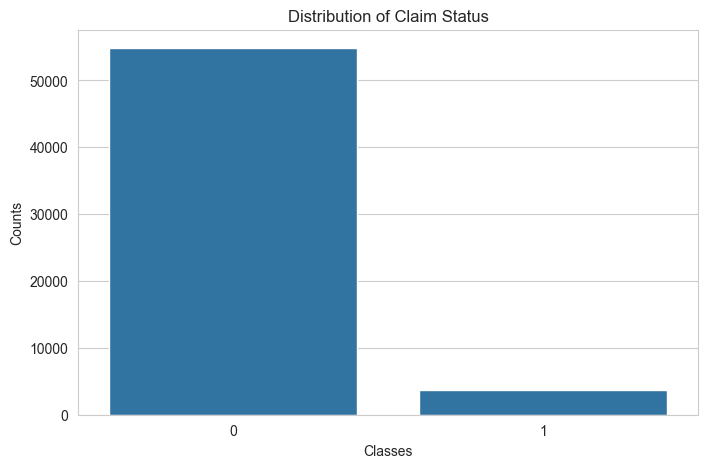

In [8]:
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x=data['claim_status'])
plt.title("Distribution of Claim Status")
plt.xlabel("Classes")
plt.ylabel("Counts")
plt.show()

In [9]:
data['claim_status'].value_counts()

claim_status
0    54844
1     3748
Name: count, dtype: int64

In [10]:
data.head()

,policy_id,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
0,POL045360,9.3,1.2,41,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
1,POL016745,8.2,1.8,35,C2,27003,C1,M9,Diesel,200Nm@1750rpm,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,0
2,POL007194,9.5,0.2,44,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
3,POL018146,5.2,0.4,44,C10,73430,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
4,POL049011,10.1,1.0,56,C13,5410,B2,M5,Diesel,200Nm@3000rpm,...,No,Yes,Yes,Yes,No,No,Yes,Yes,5,0


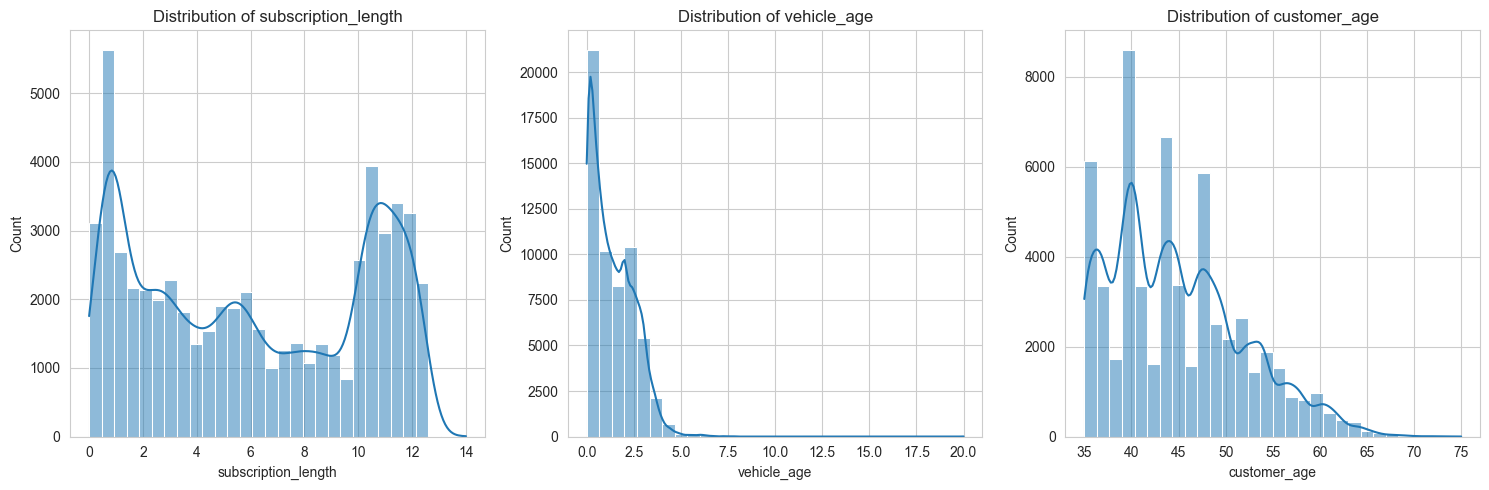

In [11]:
numerical_columns = ['subscription_length',	'vehicle_age',	'customer_age']
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(1, 3, i)
    sns.histplot(data[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")
    
plt.tight_layout()
plt.show()

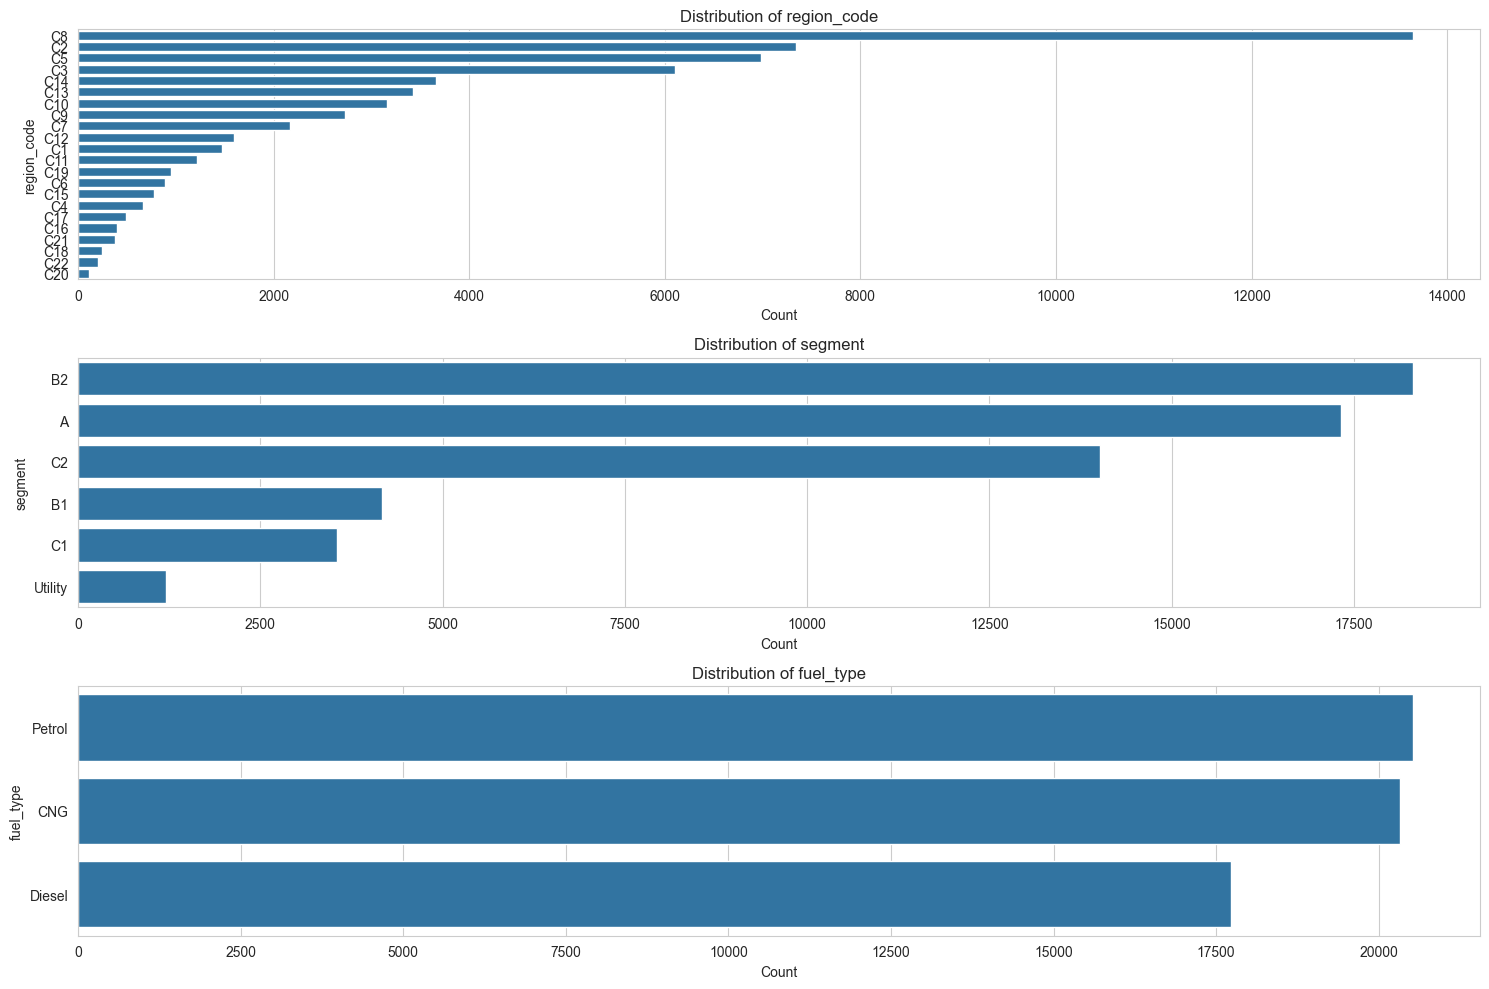

In [12]:
categorical_columns = ['region_code', 'segment', 'fuel_type']

plt.figure(figsize=(15, 10))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 1, i)
    sns.countplot(y=column, data=data, order = data[column].value_counts().index)
    plt.title(f'Distribution of {column}')
    plt.xlabel('Count')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

In [13]:
data_copy = data.copy()
def remove_outliers(data):
    
    for i in data.columns:
        if data[i].dtype != 'object':
            data['zscore'] = (data[i] - data[i].mean()) / data[i].std()
            data = data[(data['zscore'] > -3) & (data['zscore'] < 3)]
    data.drop(columns=['zscore'], inplace=True)
    return data


In [14]:
no_outlier = remove_outliers(data_copy)
no_outlier

,policy_id,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
0,POL045360,9.3,1.2,41,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
1,POL016745,8.2,1.8,35,C2,27003,C1,M9,Diesel,200Nm@1750rpm,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,0
2,POL007194,9.5,0.2,44,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
4,POL049011,10.1,1.0,56,C13,5410,B2,M5,Diesel,200Nm@3000rpm,...,No,Yes,Yes,Yes,No,No,Yes,Yes,5,0
5,POL053680,3.1,2.0,36,C7,6112,B2,M7,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,POL019269,10.6,2.6,48,C5,34738,B2,M6,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
58588,POL001254,2.3,2.2,37,C3,4076,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
58589,POL019859,6.6,2.2,35,C8,8794,B2,M6,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
58590,POL014061,4.1,3.6,44,C8,8794,B2,M6,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0


In [15]:
no_outlier.shape

(51393, 41)

In [16]:
data.shape

(58592, 41)

In [17]:
58592 - 51393

7199

In [18]:
from sklearn.utils import resample

In [19]:
data['claim_status'].value_counts()

claim_status
0    54844
1     3748
Name: count, dtype: int64

In [20]:
majority = data[data['claim_status'] == 0]
minority = data[data['claim_status'] == 1]

In [21]:
minority_oversampled = resample(minority, replace=True, n_samples=len(majority), random_state=42)
oversampled_data = p.concat([majority, minority_oversampled])
oversampled_distribution = oversampled_data['claim_status'].value_counts()
oversampled_distribution

claim_status
0    54844
1    54844
Name: count, dtype: int64

Text(0.5, 1.0, 'Customer Length Distribution')

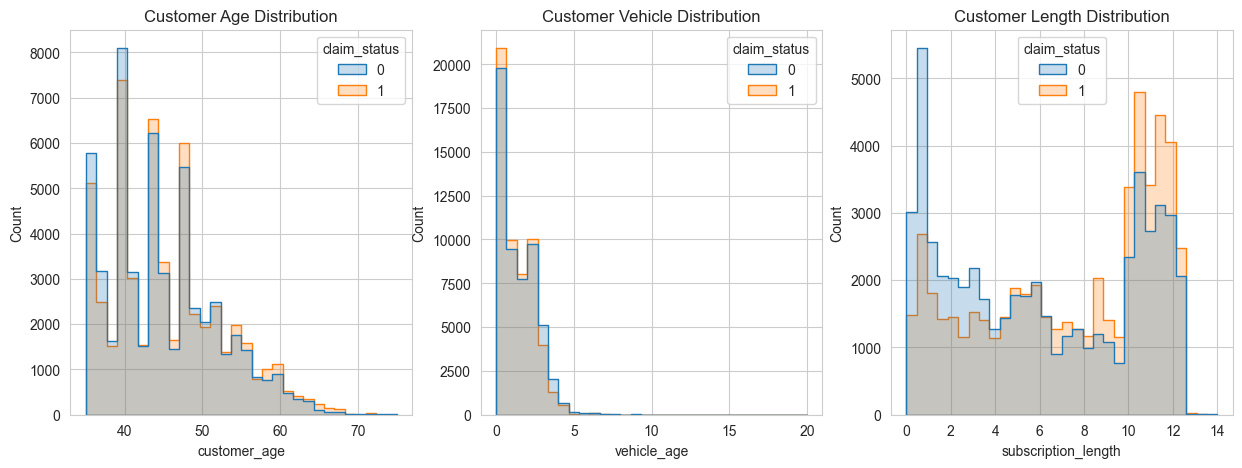

In [22]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(data=oversampled_data, x='customer_age', hue='claim_status', element='step', bins=30)
plt.title("Customer Age Distribution")

plt.subplot(1, 3, 2)
sns.histplot(data=oversampled_data, x='vehicle_age', hue='claim_status', element='step', bins=30)
plt.title("Customer Vehicle Distribution")

plt.subplot(1, 3, 3)
sns.histplot(data=oversampled_data, x='subscription_length', hue='claim_status', element='step', bins=30)
plt.title("Customer Length Distribution")  

## Feature Selection

In [23]:
from sklearn.calibration import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

le = LabelEncoder()
encoded_data = data.apply(lambda col: le.fit_transform(col) if col.dtype == 'object' else col)

In [24]:
X = encoded_data.drop(columns='claim_status')
y = encoded_data['claim_status']

In [25]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)
feature_importance = rf_model.feature_importances_
feature_df = p.DataFrame({'Feature':X.columns, 'Importance':feature_importance})
feature_df = feature_df.sort_values(by='Importance', ascending=False)
feature_df.head()

,Feature,Importance
0,policy_id,0.321072
1,subscription_length,0.248309
3,customer_age,0.176639
2,vehicle_age,0.135190
5,region_density,0.053838


In [26]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [27]:
oversampled_data = oversampled_data.drop(columns='policy_id')

In [28]:
X_oversampled = oversampled_data.drop(columns='claim_status')
y_oversampled = oversampled_data['claim_status']

In [29]:
X_oversampled_data_encoded = X_oversampled.apply(lambda col: LabelEncoder().fit_transform(col) if col.dtype=='object' else col)
X_oversampled_data_encoded

,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,max_power,...,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating
0,9.3,1.2,41,20,8794,4,5,1,4,0,...,1,1,1,1,1,1,0,1,1,3
1,8.2,1.8,35,11,27003,3,10,1,2,8,...,1,0,1,1,1,1,1,1,1,4
2,9.5,0.2,44,20,8794,4,5,1,4,0,...,1,1,1,1,1,1,0,1,1,3
3,5.2,0.4,44,1,73430,0,0,0,5,2,...,0,0,0,0,1,0,0,0,1,0
4,10.1,1.0,56,4,5410,2,6,1,3,7,...,0,0,1,1,1,0,0,1,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45723,11.6,0.2,54,17,34738,1,9,0,6,3,...,0,0,1,1,1,0,0,1,1,2
36093,11.3,1.0,61,17,34738,2,7,2,0,6,...,0,1,1,1,1,1,1,1,1,2
54154,7.7,0.0,49,2,6108,0,0,0,5,2,...,0,0,0,0,1,0,0,0,1,0
48891,11.2,1.0,44,20,8794,4,5,1,4,0,...,1,1,1,1,1,1,0,1,1,3


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_oversampled_data_encoded, y_oversampled, test_size=0.3, random_state=42)

In [31]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((76781, 39), (76781,), (32907, 39), (32907,))

In [32]:
from sklearn.model_selection import GridSearchCV

In [68]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [33]:
rf_model_oversampled = RandomForestClassifier(random_state=42)
rf_model_oversampled.fit(X_train, y_train)
y_pred = rf_model_oversampled.predict(X_test)

In [34]:
print(classification_report(y_pred=y_pred, y_true=y_test))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     16574
           1       0.96      1.00      0.98     16333

    accuracy                           0.98     32907
   macro avg       0.98      0.98      0.98     32907
weighted avg       0.98      0.98      0.98     32907



In [69]:
rf_model_oversampled = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_model_oversampled, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

In [70]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


KeyboardInterrupt: 

In [ ]:
best_params = grid_search.best_params_
best_params

In [ ]:
best_rf = grid_search.best_estimator_
best_rf

In [ ]:
y_pred = best_rf.predict(X_test)

In [ ]:
print(classification_report(y_pred=y_pred, y_true=y_test))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98     16574
           1       0.95      1.00      0.98     16333

    accuracy                           0.98     32907
   macro avg       0.98      0.98      0.98     32907
weighted avg       0.98      0.98      0.98     32907

